# Machine Learning

In [1]:
import pandas as pd #Dataframe, Series
import numpy as np

from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Read in data from collection and cleaning
df = pd.read_csv('clean_data3.csv')

In [3]:
#Get rid of unecessay first column
df = df.drop(columns='Unnamed: 0')

Based on the previous section, the best features to train our model are most likely: danceability, valence, energy, and loudness. This is because there is some apparent difference between happy and sad songs within each of these features. 

In [4]:
features = ["danceability", "valence", "energy", "loudness"]

In [5]:
trainingData = df
train, test = train_test_split(trainingData, test_size=0.10)
print("Training size: {}, Test size: {}".format(len(train), len(test)))

Training size: 621, Test size: 69


In [6]:
x_train = train[features]
y_train = train["Sad/Happy"]

x_test = test[features]
y_test = test["Sad/Happy"]

## Models on models...

In [7]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(min_samples_split=29)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Decision Tree: ", round(score,1), "%")

Accuracy using Decision Tree:  56.5 %


In [8]:
from sklearn.neighbors import KNeighborsClassifier
k = 20
knn = KNeighborsClassifier(k)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
score = accuracy_score(y_test, knn_pred) * 100
print("Accuracy using %d-Knn Tree: " %k, round(score, 1), "%")

Accuracy using 20-Knn Tree:  62.3 %


In [9]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=9, n_estimators=49, max_features=1)
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, forest_pred) * 100
print("Accuracy using random forest: ", round(score, 1), "%")

Accuracy using random forest:  73.9 %


In [10]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=70)
ada.fit(x_train, y_train)
ada_pred = ada.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, ada_pred) * 100
print("Accuracy using ada: ", round(score, 1), "%")

Accuracy using ada:  69.6 %


In [11]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(x_train, y_train)
gauss_pred = gauss.predict(x_test)
score = accuracy_score(y_test, gauss_pred)*100
print("Accuracy using gauss: ", round(score, 1), "%")

Accuracy using gauss:  71.0 %


In [12]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=80, learning_rate=1, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
predicted = gbc.predict(x_test)
score = accuracy_score(y_test, predicted)*100
print("Accuracy using Gbc: ", round(score, 1), "%")

Accuracy using Gbc:  69.6 %


## Tweaking the GBC parameters

Now that we have our best performing model (for me the most consistently accurate was GBC), let's see if we can improve its accuracy even more by adjusting the n_estimators and learning_rate. 

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import *
from sklearn.pipeline import Pipeline

### Model Parameters: ###
- **learning rate**: shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
- **n_estimators**: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

In [15]:
def test_gbc(n, lr, x_train, y_train, x_test, y_test):
    model =  GradientBoostingClassifier(n_estimators=n,learning_rate=lr, max_depth=1, random_state=1)
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)
    score = accuracy_score(y_test, model_pred)
    return score

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
accuracys = []
n_vals = range(2,200)
lr_vals =  np.arange(0.1,1, 0.01)
for n in lr_vals:
    score = test_gbc(50, n, x_train, y_train, x_test, y_test)
    accuracys.append(score)
acc_series = pd.Series(accuracys, index=lr_vals)


We see that a value of 50 maximizes for n_estimators maximizes our accuracy. Now let's see how the learning rate will effect accuracy.

0.24    0.724638
0.30    0.724638
0.26    0.724638
0.25    0.724638
0.10    0.710145
dtype: float64

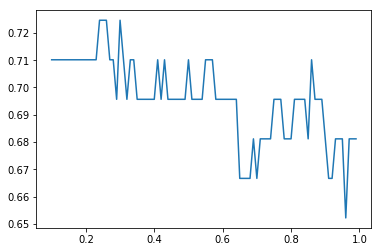

In [21]:
acc_series.plot.line()
acc_series.sort_values(ascending=False)[:.1]

As seen in the graph below, a learning rate of 0.24 maximizes our accuracy for n_estimators=50. It appears that once the learning rate reaches beyond 0.8, the accuracy actually starts to go down. This suggests that learning rate is a very sensitive parameter to adjust. 

0.24    0.724638
0.30    0.724638
0.26    0.724638
0.25    0.724638
0.10    0.710145
dtype: float64

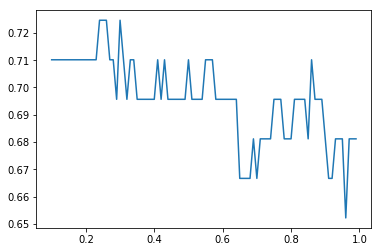

In [24]:
accuracys = []
for n in np.arange(0.1, 1,0.01):
    forest =  GradientBoostingClassifier(n_estimators=50, learning_rate=n, max_depth=1, random_state=1)
    forest.fit(x_train, y_train)
    forest_pred = forest.predict(x_test)
    score = accuracy_score(y_test, forest_pred)
    accuracys.append(score)
    
acc_series = pd.Series(accuracys, index=np.arange(0.1,1,0.01))
acc_series.plot.line()
acc_series.sort_values(ascending=False)[:.1]

# Does our Model Work?

Let's see if we can actually predict the emotional sentiment of a brand new set of songs!

In [25]:
#Our best model is GBC.
model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.24, max_depth=1, random_state=1)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using GBC: ", round(score,1), "%")

Accuracy using GBC:  72.5 %


### Using our model to classify a new list of songs as either Happy or Sad...

In [26]:
#Read in test data. Notice that there is no emotional sentiment yet. 
test_df = pd.read_csv("test_data.csv")
test_df = test_df.drop(columns='Unnamed: 0')
test_df.head()

,Name,Title,Artist,Sad/Happy,parent,album,artists,available_markets,disc_number,duration_ms,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,time_signature
0,Jeremy,Human Sadness,The Voidz,NaN,NaN,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1,656836,...,1,0.0469,0.220000,0.80800,0.1130,0.132,121.623,https://api.spotify.com/v1/tracks/2avCzL6HtaJ5...,https://api.spotify.com/v1/audio-analysis/2avC...,4
1,Jeremy,Trailer Trash,Modest Mouse,NaN,NaN,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AR', 'AT', 'BE', 'BG', 'BH', 'BO...",1,349600,...,1,0.0347,0.076400,0.00522,0.0618,0.714,163.619,https://api.spotify.com/v1/tracks/0WkhmPY4bLSi...,https://api.spotify.com/v1/audio-analysis/0Wkh...,4
2,Jeremy,Heroes,David Bowie,NaN,NaN,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1,371413,...,1,0.0297,0.000671,0.48400,0.0920,0.435,112.114,https://api.spotify.com/v1/tracks/7Jh1bpe76CNT...,https://api.spotify.com/v1/audio-analysis/7Jh1...,4
3,Jeremy,I’m so lonesome I could cry,Hank Williams,NaN,NaN,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['CA', 'MX', 'US']",1,169067,...,1,0.0304,0.812000,0.00236,0.3440,0.369,112.033,https://api.spotify.com/v1/tracks/4tj7IsJrn4Mv...,https://api.spotify.com/v1/audio-analysis/4tj7...,3
4,Jeremy,Pale Blue Eyes,The Velvet Underground,NaN,NaN,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['CA', 'MX', 'US']",1,339533,...,1,0.0370,0.913000,0.00123,0.1030,0.310,82.641,https://api.spotify.com/v1/tracks/7urDSX97YCwD...,https://api.spotify.com/v1/audio-analysis/7urD...,4


Now we generate the playlist...

In [27]:
pred = model.predict(test_df[features])
i = 0
for prediction in pred:
    print("Title:  {}\nArtist: {}\nEmotional Sentiment: {}\n".format(test_df["Title"][i],test_df["Artist"][i], prediction))
    i+=1

Title:  Human Sadness
Artist: The Voidz
Emotional Sentiment: S

Title:  Trailer Trash
Artist: Modest Mouse
Emotional Sentiment: H

Title:  Heroes
Artist: David Bowie
Emotional Sentiment: H

Title:  I’m so lonesome I could cry
Artist: Hank Williams
Emotional Sentiment: S

Title:  Pale Blue Eyes
Artist: The Velvet Underground
Emotional Sentiment: S

Title:  Folsom Prison Blues
Artist: Johnny Cash
Emotional Sentiment: H

Title:  Fell in Love with a girl
Artist: The White Stripes
Emotional Sentiment: S

Title:  Girlfriend
Artist: Ty Segall
Emotional Sentiment: S

Title:  Nerve Jamming
Artist: Bass Drum Of Death
Emotional Sentiment: S

Title:  Some Things Last a long time
Artist: Daniel Johnston
Emotional Sentiment: S

Title:  One
Artist: Harry Nilsson
Emotional Sentiment: S

Title:  Get Found
Artist: Bass Drum of Death
Emotional Sentiment: S

Title:  Zond
Artist: Pond
Emotional Sentiment: H

Title:  Ladies Of Cambridge
Artist: Vampire Weekend
Emotional Sentiment: H

Title:  Near Wild Heave